[1, 2, 3, 4]
[(1, 2), (1, 3), (2, 4)]
4


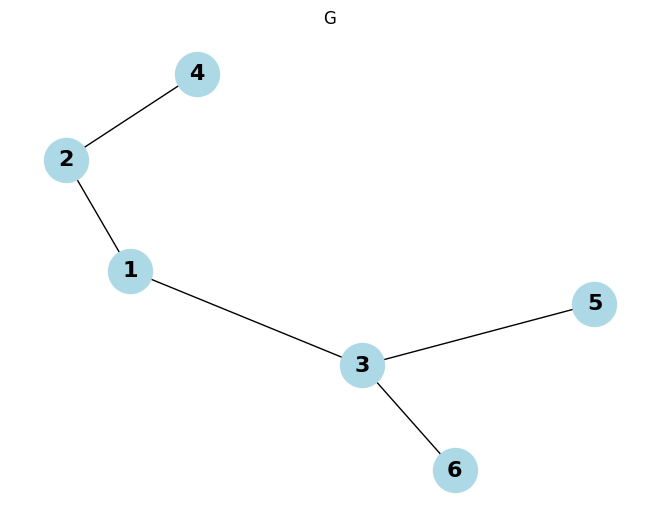

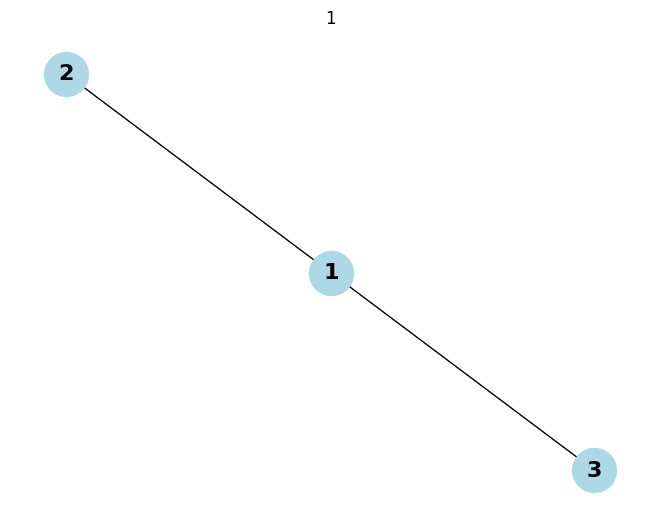

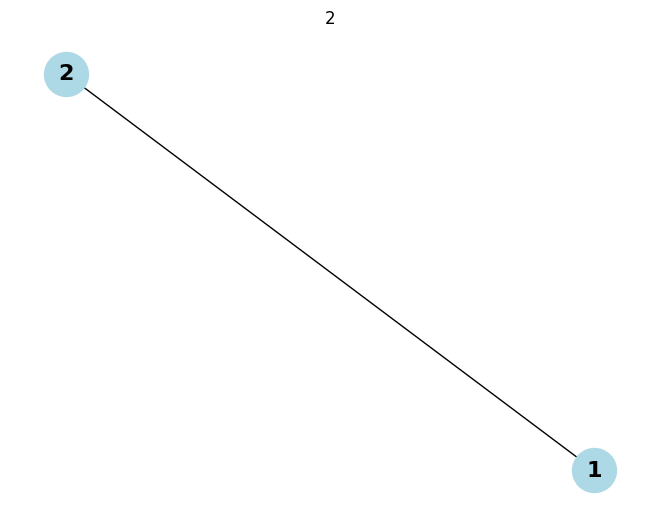

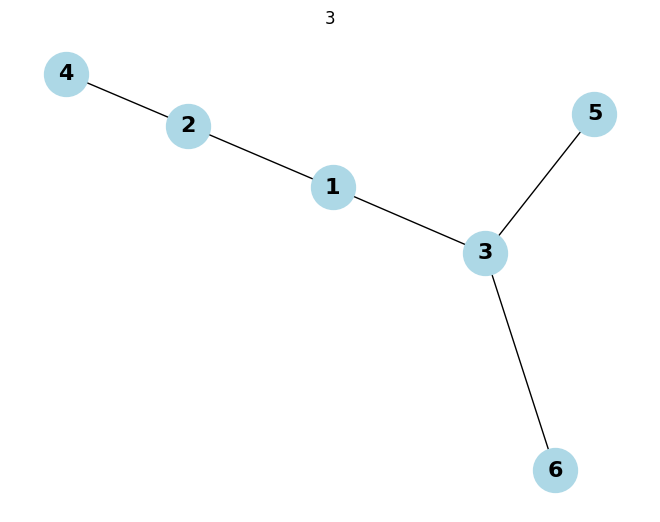

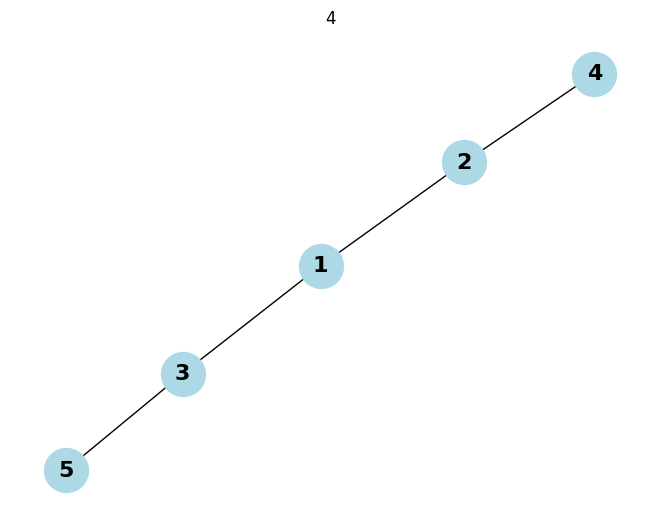

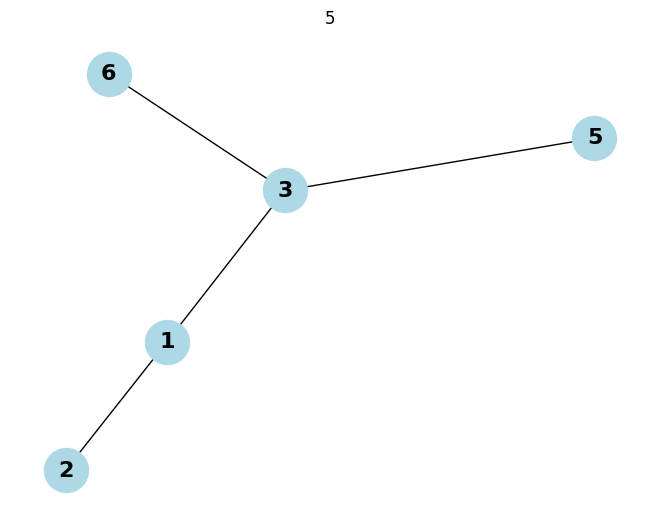

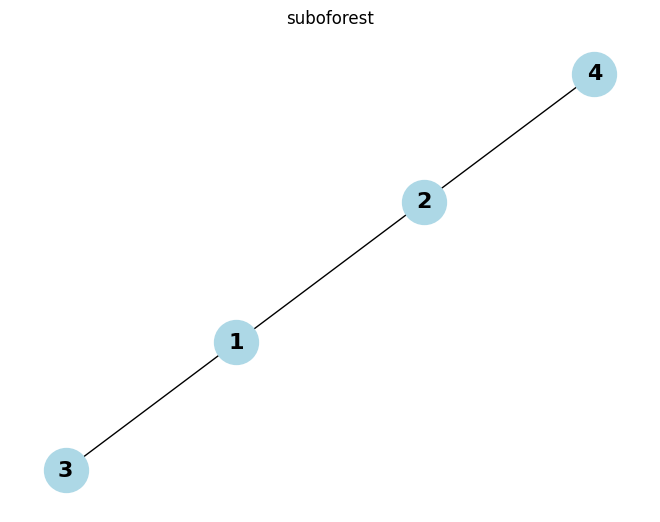

In [14]:
import matplotlib.pyplot as plt
import itertools
import networkx as nx



def sadrzi_izomorfno(G, H):
    for h in H:
        gm = nx.algorithms.isomorphism.GraphMatcher(G, h)
        if gm.is_isomorphic():
            return True
    return False

def maximum_subforest(G, H):

    n = len(G.nodes)
    max_subforest = None
    max_size = 0

    for i in range (1, n+1):
        
        for komb in itertools.combinations(G.nodes, i):
            podstablo = G.subgraph(komb)
            if nx.is_connected(podstablo):
                if not sadrzi_izomorfno(podstablo, H):
                    if len(podstablo.nodes) > max_size:
                        max_size = len(podstablo.nodes)
                        max_subforest = podstablo
                    
    return max_subforest, max_size

G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])

H = []
h1 = nx.Graph()
h1.add_edges_from([(1,2), (1,3)])
H.append(h1)


h2 = nx.Graph()
h2.add_edges_from([(1,2)])
H.append(h2)

h3 = nx.Graph()
h3.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])
H.append(h3)


h4 = nx.Graph()
h4.add_edges_from([(1,2), (1,3), (2,4), (3,5)])
H.append(h4)


h5 = nx.Graph()
h5.add_edges_from([(1,2), (1,3), (3,5), (3,6)])
H.append(h5)


subforest, size = maximum_subforest(G,H)

print(subforest.nodes)
print(subforest.edges)
print(size)



nx.draw(G, with_labels=True, node_color = 'lightblue', node_size = 1000, font_size = 16, font_color = 'black', font_weight = 'bold')
plt.title("G")
plt.show()
i = 0
for h in H:
    i = i+1
    nx.draw(h, with_labels=True, node_color = 'lightblue', node_size = 1000, font_size = 16, font_color = 'black', font_weight = 'bold')
    plt.title(i)
    plt.show()
    


nx.draw(subforest, with_labels=True, node_color = 'lightblue', node_size = 1000, font_size = 16, font_color = 'black', font_weight = 'bold')
plt.title("suboforest")
plt.show()

